<a href="https://colab.research.google.com/github/mariokart345/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-multiple-regression/LS_DS_133_Multiple_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

#Use the following information to answer assignment questions 1 - 13.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [1]:
#Import the Brainhead.csv dataset from a URL and print the first few rows
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'
df = pd.read_csv(data_url, skipinitialspace=True, header=0)
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


From the data dictionary:

Gender: 1 = male, 2 = female

Age: 1 = younger than age 46, 2 = age 46 and older

1) Run the OLS model relating head size to brain weight (you should have done this in your project yesterday) and print your results

In [3]:
from statsmodels.formula.api import ols
model=ols('Brain ~ Head',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        22:47:05   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

2) What is the adjusted $R^2$ for this model?  Explain what this value means in a complete sentence.



Answer here: The adj. R-squared for this model is 0.638. The adj. R-squared value means


3) Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the dataframe to do this - don't overwrite the original variables.

In [4]:
df['Age2']=df['Age']-1

In [30]:
df[df['Age']==2].head()

,Gender,Age,Head,Brain,Age2
57,1,2,4166,1560,1
58,1,2,3935,1330,1
59,1,2,3669,1222,1
60,1,2,3866,1415,1
61,1,2,3393,1175,1


4) Model the relationship of age group and head size to brain weight.

In [12]:
model=ols('Brain ~ Head + Age2',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        22:52:24   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

5) At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: We reject the null hypothosis at the alpha 0.05 level that Age group and brain weight after accounting for head size, is statistically significant.

6) At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: We fail to reject the null hypothosis at the alpha 0.01 level that Age group and brain weight after accounting for head size, is statistically significant.

7) What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  Does adding age group to the model increase the amount of variability in brain weight explained by the model?

Answer here: The adjusted $R^2$ relating head size and age group to brain weight is 0.64 or 64%. Adding age group to the model does increase the variability.

8) Model the relationship of gender and head size to brain weight.

In [60]:
model=ols('Brain ~ Gender + Head',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.15e-53
Time:                        05:35:44   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    396.5754     64.252      6.172      0.0

9) At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: Gender is not statistically significant at the alpha 0.05 level with having a p-val of 0.11

10) Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight.




Answer here: $\hat{y} = 4.18 - 0.0006x -0.0005x_2$

11) Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals.

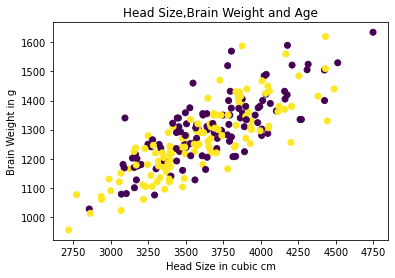

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
plt.scatter(x='Head',y='Brain',c='Age2',data=df)
ax.set_xlabel('Head Size in cubic cm')
ax.set_ylabel('Brain Weight in g')
ax.set_title('Head Size,Brain Weight and Age')
plt.show();

12) Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm.

In [24]:
intercept=model.params[0]
slope1=model.params[1]
slope2=model.params[2]
x1=4000
x2=60
prediction=intercept+(slope1*x1)-(slope2*x2)
print(prediction)

2472.0351183536186


Answer here: The estimated brain weight is 2472g.

13) Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm.

In [25]:
intercept=model.params[0]
slope1=model.params[1]
slope2=model.params[2]
x1=3900
x2=20
prediction=intercept+(slope1*x1)-(slope2*x2)
print(prediction)

1732.4804876528592


Answer here: The estimated brain weight is 1732g.

###Use the following information to answer questions 14 - 20


Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [26]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep['Log_gest'] = np.log(sleep['Gest'])

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


14) Plot the relationship of body size to dreaming sleep and describe the shape of the relationship.

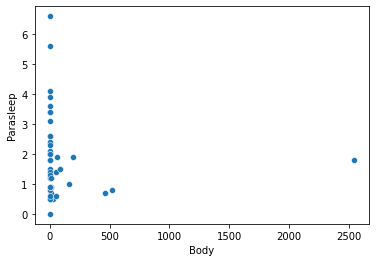

In [27]:
import seaborn as sns
ax=sns.scatterplot(x='Body',y='Parasleep',data=sleep)

Answer here: It is very hard to determine a relationship between body size and dreaming sleep because most of the points seem to be on close to 0 on the x axis

15) Does it appear that a log transformation would improve the model fit?  If yes, perform the log transformation and plot the resulting relationship with dreaming sleep.

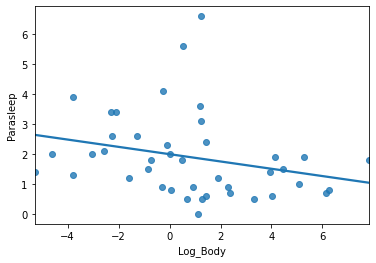

In [45]:
import numpy as np
sleep['Log_Body']=np.log(sleep['Body'])
ax=sns.regplot(x='Log_Body',y='Parasleep',data=sleep,ci=None)

Answer here: It seemed to improve the model fit

16) Run an ols model using gestation time, danger index and the log of body size.  Is the log of body size statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors?

In [53]:
model=ols('Parasleep ~ Gest + Log_Body + C(Danger)',data=sleep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     4.670
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00138
Time:                        04:20:22   Log-Likelihood:                -60.534
No. Observations:                  42   AIC:                             135.1
Df Residuals:                      35   BIC:                             147.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5683      0.392      9.

Answer here: It doesnt seem like the log of body size is statistically significantly associated with time spent in dreaming sleep

17) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

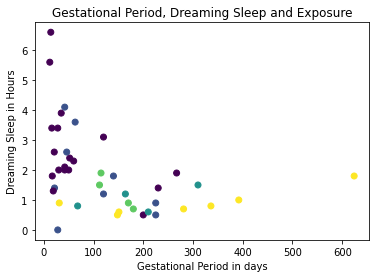

In [38]:
fig,ax=plt.subplots()
plt.scatter(x='Gest',y='Parasleep',c='Exposure',data=sleep)
ax.set_xlabel('Gestational Period in days')
ax.set_ylabel('Dreaming Sleep in Hours')
ax.set_title('Gestational Period, Dreaming Sleep and Exposure')
plt.show();

Answer here: 

18) Run an ols model using the log of gestation time and sleep exposure index to predict the amount of time spent in dreaming sleep.  Is sleep exposure index a better predictor of amount of time spent in dreaming sleep than danger index?

In [58]:
sleep['Log_Gest']=np.log(sleep['Gest'])
model=ols('Parasleep ~ Log_Gest + C(Danger)',data=sleep).fit()
print(model.summary())
model=ols('Parasleep ~ Log_Gest + C(Exposure)',data=sleep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9.071
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.19e-05
Time:                        04:31:32   Log-Likelihood:                -55.763
No. Observations:                  42   AIC:                             123.5
Df Residuals:                      36   BIC:                             134.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8263      0.731      7.

Answer here: The Danger Index would be a better predictor for time spent in dreaming sleep because of Adj. R-square.

19) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

In [41]:
print('Instructually the same as #17')

Instructually the same as #17


Answer here: 

20) Run an ols model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of amount of time spent in dreaming sleep than danger index?

In [59]:
model=ols('Parasleep ~ Log_Gest + C(Pred)',data=sleep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     5.983
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           0.000398
Time:                        05:34:03   Log-Likelihood:                -60.182
No. Observations:                  42   AIC:                             132.4
Df Residuals:                      36   BIC:                             142.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.4498      0.840      6.489   

Answer here:  Danger is still the best predictor  of amount of time spent in dreaming sleep

#Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for imporvement.



---

